# Build a predictive maintenance model for a delivery company - Classification

Bu proje, bir teslimat şirketi için bir tahmini bakım modeli oluşturmayı amaçlamaktadır. Veri setindeki sınıf dengesizliğini ele almak için SMOTE kullanarak, makine öğrenimi algoritmalarıyla tehditlerin belirlenmesi ve önleyici bakım stratejilerinin geliştirilmesi hedeflenmektedir.

In [1]:
#!pip install imblearn

In [2]:
#!pip install scikit-learn==1.2.2

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [4]:
df=pd.read_csv('failure.csv')
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [5]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
x=df.drop(['date','device','failure'],axis=1)
y=df['failure']
x

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,215630672,56,0,52,6,407438,0,0,7
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,8,0
124490,172556680,96,107,4,11,332792,0,0,13
124491,19029120,4832,0,0,11,350410,0,0,0
124492,226953408,0,0,0,12,358980,0,0,0


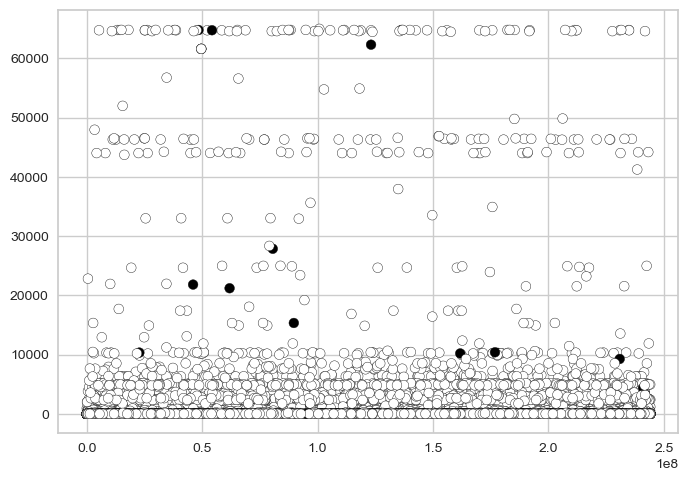

In [8]:
plt.scatter(x.attribute1, x.attribute2, marker="o", c=y ,edgecolor="k");

In [9]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

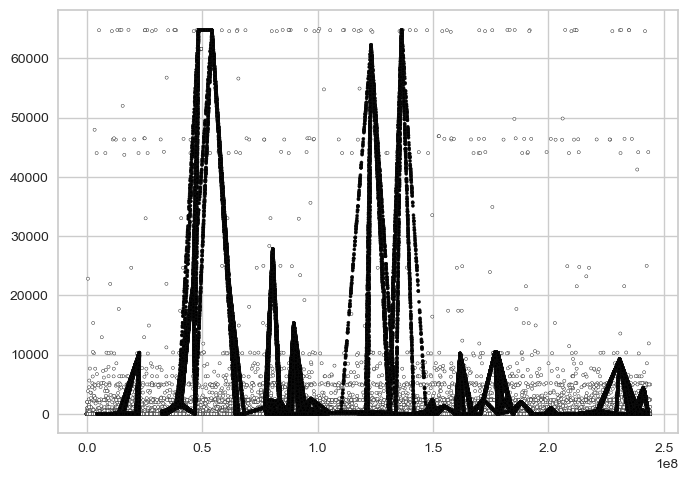

In [10]:
plt.scatter(x.attribute1, x.attribute2, marker="o", c=y, s=5, edgecolor="k");

In [11]:
x['device']=df['device']

In [12]:
x=pd.get_dummies(x,drop_first=True)

In [13]:
x.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,device_S1F013BB,...,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX
0,215630672,56,0,52,6,407438,0,0,7,False,...,False,False,False,False,False,False,False,False,False,False
1,61370680,0,3,0,6,403174,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,173295968,0,0,0,12,237394,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,79694024,0,0,0,6,410186,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,135970480,0,0,0,15,313173,0,0,3,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
g=GaussianNB()
b=BernoulliNB()

In [17]:
g.fit(x_train,y_train)

GaussianNB()

In [18]:
gthamin=g.predict(x_test)

In [19]:
accuracy_score(gthamin,y_test)

0.580733981831337

In [20]:
confusion_matrix(gthamin,y_test)

array([[24629, 20738],
       [  123,  4266]], dtype=int64)

In [21]:
r=RandomForestClassifier()
r.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
rtahmin=r.predict(x_test)

In [23]:
 accuracy_score(y_test, rtahmin)

0.9995980384275264